# Projeto de Estatística II


## Parte I - Regressão Linear

-------------------------------

**Instruções:**

- A primeira parte do projeto engloba a avliação dos tópicos de regressão linear.
- Ela deve ser entregue até o dia 26/04/2022.
- Para a entrega, salve seu notebook na pasta Projetos do nosso drive com o nome do notebook com o seguinte padrão: [primeiro nome]_[sobrenome]_projeto_estatistica_II_parteI.ipynb
- A avaliação será registrada nos notebooks em formato de comentários.
-------------------------------

O dataset 'cancer_EUA.csv' relaciona a taxa de mortalidade por câncer em alguns condados dos EUA e outras features destes condados.

Dicionário dos dados:

* TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities

* avgAnnCount: Mean number of reported cases of cancer diagnosed annually

* avgDeathsPerYear: Mean number of reported mortalities due to cancer

* incidenceRate: Mean per capita (100,000) cancer diagoses

* medianIncome: Median income per county

* popEst2015: Population of county

* povertyPercent: Percent of populace in poverty

* studyPerCap: Per capita number of cancer-related clinical trials per county

* binnedInc: Median income per capita binned by decile

* MedianAge: Median age of county residents

* MedianAgeMale: Median age of male county residents

* MedianAgeFemale: Median age of female county residents

* Geography: County name

* AvgHouseholdSize: Mean household size of county

* PercentMarried: Percent of county residents who are married

* PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

* PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

* PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

* PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

* PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

* PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

* PctEmployed16_Over: Percent of county residents ages 16 and over employed

* PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

* PctPrivateCoverage: Percent of county residents with private health coverage

* PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

* PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

* PctPublicCoverage: Percent of county residents with government-provided health coverage

* PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

* PctWhite: Percent of county residents who identify as White

* PctBlack: Percent of county residents who identify as Black

* PctAsian: Percent of county residents who identify as Asian

* PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

* PctMarriedHouseholds: Percent of married households

* BirthRate: Number of live births relative to number of women in county

O objetivo da primeira parte do projeto é criar um modelo linear para prever o target (TARGET_deathRate). Para isso, siga o passo a passo abaixo e apresente seus raciocínios e resultados. 

In [70]:
# importe as principais bibliotecas de análise de dados
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

1. Antes de qualquer exploração dos dados, leia o dicionário dos dados e reflita sobre a feature que você acredita ser mais correlacionada com o target. (Sem medo de errar. Não existe certo ou errado nesta questão.) 

## RESPOSTA: 

A feature que eu mais acho correlacionada com o target é a incidenceRate que mede a taxa de diagnósticos de câncer.


2. Agora, realize um EDA na base de dados para entender mais sobre as features. Quais são suas conclusões?

In [71]:
# lendo a base
df = pd.read_csv('./datasets/cancer_EUA.csv',sep = ';')

In [72]:
# visualizando as primeiras linhas
df.head()

avgAnnCount   avgDeathsPerYear TARGET_deathRate incidenceRate medIncome  \
0      1397,0  890,7705285028013            164,9         489,8   61898,0   
1       173,0  669,0883630446194            161,3         411,6   48127,0   
2       102,0  744,0834616315638            174,7         349,7   49348,0   
3       427,0  953,7733391577932            194,8         430,4   44243,0   
4        57,0  646,1944378671657            144,4         350,1   49955,0   

  popEst2015 povertyPercent  studyPerCap           binnedInc MedianAge  ...  \
0   260131,0           11,2  499,7482038   (61494.5, 125635]      39,3  ...   
1    43269,0           18,6  23,11123437  (48021.6, 51046.4]      33,0  ...   
2    21026,0           14,6  47,56016361  (48021.6, 51046.4]      45,0  ...   
3    75882,0           17,1  342,6372526    (42724.4, 45201]      42,8  ...   
4    10321,0           12,5          0,0  (48021.6, 51046.4]      48,3  ...   

  PctPrivateCoverageAlone PctEmpPrivCoverage PctPublicCoverage  \
0                     NaN               41,6              32,9   
1                    53,8               43,6              31,1   
2                    43,5               34,9              42,1   
3                    40,3               35,0              45,3   
4                    43,9               35,1              44,0   

  PctPublicCoverageAlone     PctWhite     PctBlack     PctAsian PctOtherRace  \
0                   14,0  81,78052858  2,594728333  4,821857102  1,843478533   
1                   15,3  89,22850915  0,969102455  2,246232585  3,741351531   
2                   21,1   90,9221902  0,739673391  0,465898175  2,747358309   
3                   25,0  91,74468649  0,782625968   1,16135867  1,362643183   
4                   22,7  94,10402393  0,270192029  0,665830358  0,492135482   

  PctMarriedHouseholds    BirthRate  
0          52,85607588  6,118831029  
1          45,37250044  4,333095578  
2          54,44486837  3,729487817  
3          51,02151448  4,603840773  
4          54,02745995  6,796657382  

[5 rows x 34 columns]

In [73]:
# verificando tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   avgAnnCount              3047 non-null   object
 1   avgDeathsPerYear         3047 non-null   object
 2   TARGET_deathRate         3047 non-null   object
 3   incidenceRate            3047 non-null   object
 4   medIncome                3047 non-null   object
 5   popEst2015               3047 non-null   object
 6   povertyPercent           3047 non-null   object
 7   studyPerCap              3047 non-null   object
 8   binnedInc                3047 non-null   object
 9   MedianAge                3047 non-null   object
 10  MedianAgeMale            3047 non-null   object
 11  MedianAgeFemale          3047 non-null   object
 12  Geography                3047 non-null   object
 13  AvgHouseholdSize         3047 non-null   object
 14  PercentMarried           3047 non-null  

In [101]:
# Transformando objects em float


#df['avgAnnCount'] = df['avgAnnCount'].astype(float)
# df['avgDeathsPerYear'] = df['avgDeathsPerYear'].str.replace(',','.').astype(float)
#df['TARGET_deathRate'] = df['TARGET_deathRate'].str.replace(',','.').astype(float)
# df['incidenceRate'] = df['incidenceRate'].str.replace(',','.').astype(float)
# df['medIncome'] = df['medIncome'].str.replace(',','.').astype(float)
# df['popEst2015'] = df['popEst2015'].str.replace(',','.').astype(float)
# df['povertyPercent'] = df['povertyPercent'].str.replace(',','.').astype(float)
# df['studyPerCap'] = df['studyPerCap'].str.replace(',','.').astype(float)
# df['binnedInc'] = df['binnedInc'].str.replace(',','.').astype(float)
# df['MedianAge'] = df['MedianAge'].str.replace(',','.').astype(float)
# df['MedianAgeMale'] = df['MedianAgeMale'].str.replace(',','.').astype(float)
# df['MedianAgeFemale'] = df['MedianAgeFemale'].str.replace(',','.').astype(float)
# df['AvgHouseholdSize'] = df['AvgHouseholdSize'].str.replace(',','.').astype(float)
# df['PercentMarried'] = df['PercentMarried'].str.replace(',','.').astype(float)
# df['PctNoHS18_24'] = df['PctNoHS18_24'].str.replace(',','.').astype(float)
# df['PctHS18_24'] = df['PctHS18_24'].str.replace(',','.').astype(float)
# df['PctSomeCol18_24'] = df['PctSomeCol18_24'].str.replace(',','.').astype(float)
# df['PctBachDeg18_24'] = df['PctBachDeg18_24'].str.replace(',','.').astype(float)
# df['PctHS25_Over'] = df['PctHS25_Over'].str.replace(',','.').astype(float)
# df['PctBachDeg25_Over'] = df['PctBachDeg25_Over'].str.replace(',','.').astype(float)
# df['PctEmployed16_Over'] = df['PctEmployed16_Over'].str.replace(',','.').astype(float)
# df['PctUnemployed16_Over'] = df['PctUnemployed16_Over'].str.replace(',','.').astype(float)
# df['PctPrivateCoverage'] = df['PctPrivateCoverage'].str.replace(',','.').astype(float)
# df['PctPrivateCoverageAlone'] = df['PctPrivateCoverageAlone'].str.replace(',','.').astype(float)
# df['PctEmpPrivCoverage'] = df['PctEmpPrivCoverage'].str.replace(',','.').astype(float)
# df['PctPublicCoverage'] = df['PctPublicCoverage'].str.replace(',','.').astype(float)
# df['PctPublicCoverageAlone'] = df['PctPublicCoverageAlone'].str.replace(',','.').astype(float)
# df['PctWhite'] = df['PctWhite'].str.replace(',','.').astype(float)
# df['PctBlack'] = df['PctBlack'].str.replace(',','.').astype(float)
# df['PctAsian'] = df['PctAsian'].str.replace(',','.').astype(float)
# df['PctOtherRace'] = df['PctOtherRace'].str.replace(',','.').astype(float)
# df['PctMarriedHouseholds'] = df['PctMarriedHouseholds'].str.replace(',','.').astype(float)
# df['BirthRate'] = df['BirthRate'].str.replace(',','.').astype(float)




In [99]:
df.dtypes

avgAnnCount                float64
avgDeathsPerYear           float64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                  float64
popEst2015                 float64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            

In [102]:
# Estatísticas 
 df.describe()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        843.919853        178.491008     448.268586   
std     1416.356223        143.907390         27.629797      54.560733   
min        6.000000        294.277385         56.000000     201.300000   
25%       76.000000        746.660187        161.200000     420.300000   
50%      171.000000        842.516774        178.100000     453.549422   
75%      518.000000        939.423171        195.200000     480.850000   
max    38150.000000       1553.351487        293.900000    1206.900000   

           medIncome    popEst2015  povertyPercent  studyPerCap    MedianAge  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       MedianAgeMale  ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
count    3047.000000  ...              2438.000000         3047.000000   
mean       39.570725  ...                48.453774           41.196324   
std         5.226017  ...                10.083006            9.447687   
min        22.400000  ...                15.700000           13.500000   
25%        36.350000  ...                41.000000           34.500000   
50%        39.600000  ...                48.700000           41.100000   
75%        42.500000  ...                55.600000           47.700000   
max        64.700000  ...                78.900000           70.700000   

       PctPublicCoverage  PctPublicCoverageAlone     PctWhite     PctBlack  \
count        3047.000000             3047.000000  3047.000000  3047.000000   
mean           36.252642               19.240072    83.645286     9.107978   
std             7.841741                6.113041    16.380025    14.534538   
min            11.200000                2.600000    10.199155     0.000000   
25%            30.900000               14.850000    77.296180     0.620675   
50%            36.300000               18.800000    90.059774     2.247576   
75%            41.550000               23.100000    95.451693    10.509732   
max            65.100000               46.600000   100.000000    85.947799   

          PctAsian  PctOtherRace  PctMarriedHouseholds    BirthRate  
count  3047.000000   3047.000000           3047.000000  3047.000000  
mean      1.253965      1.983523             51.243872     5.640306  
std       2.610276      3.517710              6.572814     1.985816  
min       0.000000      0.000000             22.992490     0.000000  
25%       0.254199      0.295172             47.763063     4.521419  
50%       0.549812      0.826185             51.669941     5.381478  
75%       1.221037      2.177960             55.395132     6.493677  
max      42.619425     41.930251             78.075397    21.326165  

[8 rows x 32 columns]

In [105]:
nulos = df. isnull().sum()


In [106]:
## Quantos valores nulos eu tenho para cada coluna . Fazer análise se a coluna com muitos valores nulos vai ser importante para 
## ser uma feature do meu modelo. Provavelmente não pois se usasse ela como feature, tería que tirar uma grande amostra do 
## conjunto de dados e acabaria perdendo muita informação. 

nulos

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [108]:
# percentual de nulos
nulos_percentual = nulos / df.shape[0]

In [110]:
# quais variáveis com mais de 50% de valores nulos
nulos_percentual[nulos_percentual>0.5]

PctSomeCol18_24    0.749918
dtype: float64

<AxesSubplot:xlabel='TARGET_deathRate', ylabel='Count'>

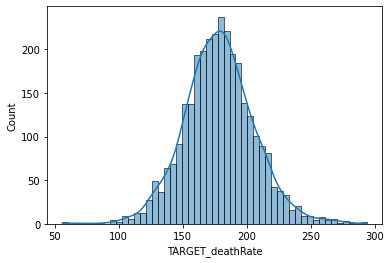

In [111]:
# assimetria

sns.histplot (data=df, x = 'TARGET_deathRate', kde = True)

In [112]:
# skewness - métrica de assimetria. Maior do que zero tem uma assemetria a direita e se é menor do que zero tem uma assemtria a 
## esquerda 

df['TARGET_deathRate'].skew()

0.12931340277335948

In [113]:
# verificar correlação das variéveis. Se tiverem variáveis que são muito correlacionadas você pode escolher só uma como feature
# Avaliar também essa correlação com a target.Se tiverem correlação baixa eu posso pensar na possibilidade de excluir do modelo.

correlacao = df.corr(method = 'spearman')

In [114]:
correlacao

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  \
avgAnnCount                 1.000000         -0.087692         -0.085583   
avgDeathsPerYear           -0.087692          1.000000          0.672511   
TARGET_deathRate           -0.085583          0.672511          1.000000   
incidenceRate               0.264905          0.274470          0.407906   
medIncome                   0.346061         -0.328660         -0.463858   
popEst2015                  0.810315         -0.043376         -0.044447   
povertyPercent             -0.195880          0.327645          0.442435   
studyPerCap                 0.508170         -0.087545         -0.112687   
MedianAge                  -0.239157         -0.006874          0.008589   
MedianAgeMale              -0.244608         -0.011604         -0.004532   
MedianAgeFemale            -0.258758          0.003867          0.019903   
AvgHouseholdSize            0.118222          0.024783          0.013300   
PercentMarried             -0.172258         -0.184165         -0.257257   
PctNoHS18_24               -0.296569          0.071910          0.124543   
PctHS18_24                 -0.235587          0.197543          0.275896   
PctSomeCol18_24             0.330782         -0.147881         -0.212383   
PctBachDeg18_24             0.381605         -0.184054         -0.270316   
PctHS25_Over               -0.347638          0.277944          0.420579   
PctBachDeg25_Over           0.392733         -0.347502         -0.501730   
PctEmployed16_Over          0.259640         -0.307593         -0.433174   
PctUnemployed16_Over        0.073620          0.284581          0.402940   
PctPrivateCoverage          0.269957         -0.301268         -0.411319   
PctPrivateCoverageAlone     0.327338         -0.265507         -0.380840   
PctEmpPrivCoverage          0.391781         -0.199474         -0.277938   
PctPublicCoverage          -0.250184          0.278845          0.402365   
PctPublicCoverageAlone     -0.153674          0.322418          0.453102   
PctWhite                   -0.182280         -0.093744         -0.101955   
PctBlack                    0.256661          0.196736          0.251542   
PctAsian                    0.561944         -0.151574         -0.207830   
PctOtherRace                0.242279         -0.120319         -0.216924   
PctMarriedHouseholds       -0.118769         -0.193525         -0.279620   
BirthRate                  -0.071837         -0.059738         -0.050487   

                         incidenceRate  medIncome  popEst2015  povertyPercent  \
avgAnnCount                   0.264905   0.346061    0.810315       -0.195880   
avgDeathsPerYear              0.274470  -0.328660   -0.043376        0.327645   
TARGET_deathRate              0.407906  -0.463858   -0.044447        0.442435   
incidenceRate                 1.000000   0.010581    0.186183        0.010033   
medIncome                     0.010581   1.000000    0.309171       -0.884297   
popEst2015                    0.186183   0.309171    1.000000       -0.083300   
povertyPercent                0.010033  -0.884297   -0.083300        1.000000   
studyPerCap                   0.162131   0.257010    0.562972       -0.125192   
MedianAge                     0.016922  -0.115359   -0.408627       -0.149297   
MedianAgeMale                 0.008706  -0.088881   -0.413663       -0.176155   
MedianAgeFemale               0.003489  -0.160013   -0.431936       -0.103869   
AvgHouseholdSize             -0.084246   0.104335    0.295149        0.088690   
PercentMarried               -0.115636   0.375900   -0.322732       -0.598271   
PctNoHS18_24                 -0.142784  -0.322642   -0.306822        0.285646   
PctHS18_24                    0.020066  -0.199432   -0.209124        0.113834   
PctSomeCol18_24               0.018900   0.274998    0.329147       -0.197924   
PctBachDeg18_24               0.103372   0.474073    0.349674       -0.430431   
PctHS25_Over                  0.128990  -0.392909   -0.380

<AxesSubplot:>

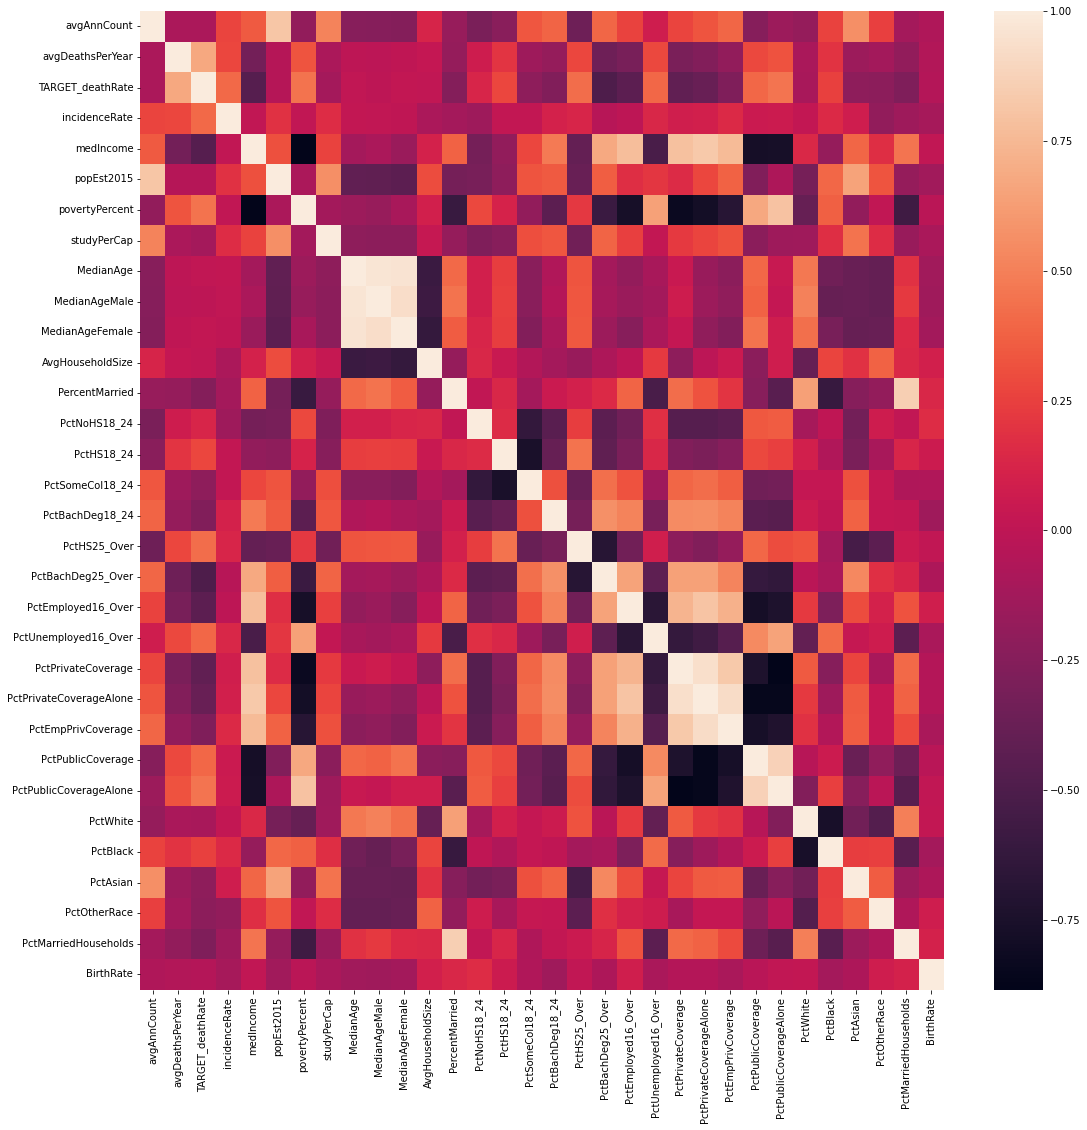

In [117]:
# É melhor visualizar pelo heatmap
plt.figure(figsize=(18,18))
sns.heatmap(correlacao)

In [121]:
# Analisando a correlação com a target (ordenado). Procurando as features mais correlacionadas para poder utilizar no modelo.
corr_ord = correlacao['TARGET_deathRate'].abs().sort_values(ascending = False)

In [122]:
corr_ord

TARGET_deathRate           1.000000
avgDeathsPerYear           0.672511
PctBachDeg25_Over          0.501730
medIncome                  0.463858
PctPublicCoverageAlone     0.453102
povertyPercent             0.442435
PctEmployed16_Over         0.433174
PctHS25_Over               0.420579
PctPrivateCoverage         0.411319
incidenceRate              0.407906
PctUnemployed16_Over       0.402940
PctPublicCoverage          0.402365
PctPrivateCoverageAlone    0.380840
PctMarriedHouseholds       0.279620
PctEmpPrivCoverage         0.277938
PctHS18_24                 0.275896
PctBachDeg18_24            0.270316
PercentMarried             0.257257
PctBlack                   0.251542
PctOtherRace               0.216924
PctSomeCol18_24            0.212383
PctAsian                   0.207830
PctNoHS18_24               0.124543
studyPerCap                0.112687
PctWhite                   0.101955
avgAnnCount                0.085583
BirthRate                  0.050487
popEst2015                 0

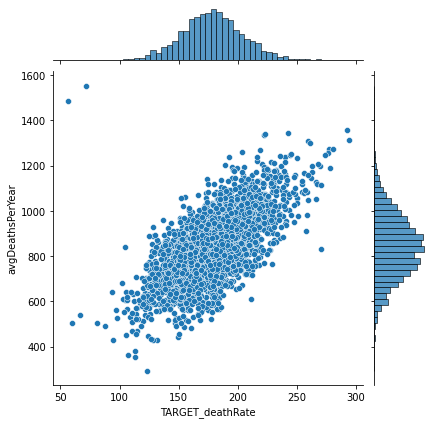

In [123]:
#Analisando o gráfico e verificando se tem possíveis outliers

sns.jointplot(data=df, x='TARGET_deathRate', y='avgDeathsPerYear')
plt.show()

In [124]:
# Possíveis outliers: média alta de mortes relatadas devido ao câncer para um baixo índice de mortalidade

df[df['avgDeathsPerYear']>1400]['avgDeathsPerYear']

1220    1553.351487
1489    1483.055135
Name: avgDeathsPerYear, dtype: float64

In [126]:
# Removendo outliers

df = df[~(df['avgDeathsPerYear']>1400)]

In [127]:
sns.jointplot(data=df, x='TARGET_deathRate', y='avgDeathsPerYear')
plt.show()

3. Como o target está distribuído? Quais são as seus valores de média, mediana e variância? A distribuição é assimétrica?

In [104]:
df['TARGET_deathRate'].describe()

count    3047.000000
mean      178.491008
std        27.629797
min        56.000000
25%       161.200000
50%       178.100000
75%       195.200000
max       293.900000
Name: TARGET_deathRate, dtype: float64

## RESPOSTA
Você pode perceber que a medida que aumenta o número da amostra, aumenta o número de mortalidade.
O valor da média é 178,50 ; da mediana é de 178,10 e desvio padrão é 27,63.
A distribuição é simétrica, a méda e mediana estão praticamente no mesmo lugar.

3. Pensando em um modelo de Regressão Linear Simples escolha uma feature para ser a variável independente, mas procure escolher uma que faça sentido com o modelo linear. 

Feature escolhida: avgDeathsPerYear (número médio de mortes relatadas devido ao câncer)

    3.1. Como é a distribuição da feature escolhida? Ela possui outliers? Precisa de alguma limpeza nos dados?

In [129]:
df['avgDeathsPerYear'].describe()

count    3045.000000
mean      843.476974
std       142.909802
min       294.277385
25%       746.638387
50%       842.477125
75%       939.286336
max      1355.378488
Name: avgDeathsPerYear, dtype: float64

<AxesSubplot:xlabel='avgDeathsPerYear', ylabel='Count'>

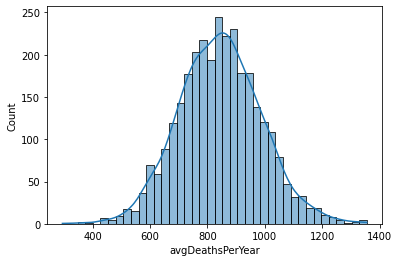

In [130]:
sns.histplot (data=df, x = 'avgDeathsPerYear', kde = True)

A medida que aumentamos a amostra podemos perceber que aumenta o número médio de mortes relatadas devido ao câncer.
Possuem outliers que já foram emilimados acima. 

    3.2. Treine um modelo de Regressão Linear Simples com o objetivo de predizer a variável dependente 'TARGET_deathRate'. Apresente o modelo treinado e avalie a normalidade dos resíduos. Não esqueça de dividir o dataset em treino e teste para uma posterior avaliação do modelo.

In [141]:
# Criando as variáveis 

x = df['avgDeathsPerYear']
y = df['TARGET_deathRate']

In [142]:
# 1) Importar o estimador

from sklearn.linear_model import LinearRegression

In [143]:
# 2) Instanciar a classe do estimador
reg_lin = LinearRegression()

In [145]:
# 3) Separando os dados em dados de treino e dados de teste

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [147]:
# Verificando se o conjunto de dados tem o mesmo tamanho
x.shape, y.shape

((3045,), (3045,))

In [148]:
#Verificando o tamanho do meu teste

x_test.shape, y_test.shape

((914,), (914,))

In [149]:
#Verificando o tamanho do meu treinamento

x_train.shape, y_train.shape

((2131,), (2131,))

In [150]:
# Ajustando o formato dos dados
x_train.values.reshape(-1, 1).shape # não importa qtas linhas eu tenha (-1) eu quero ter uma coluna (1) e vice versa 
                                    # Eu só me importo com a dimensão do número positivo. O -1 se adapata a quantidade de dados.

(2131, 1)

In [151]:
x_train.values.reshape(-1, 1)

array([[829.53544038],
       [559.86619181],
       [905.90402057],
       ...,
       [884.69916474],
       [944.07527704],
       [842.38776612]])

In [153]:
# 4) Treinando o modelo utilizando os dados de treino. 

reg_lin.fit(x_train.values.reshape(-1,1),y_train)

LinearRegression()

In [154]:
# Verificando o b0
reg_lin.intercept_

65.8707784322302

In [155]:
# Coeficiente angular. b1 
reg_lin.coef_[0]

0.13333049389990814

Equação modelo final:

$$ y = \mathcal{M} = f_{H, \hat{\vec{b}}}(x) =  65.87 + 0.13 \times \text{avgDeathsPerYear}$$

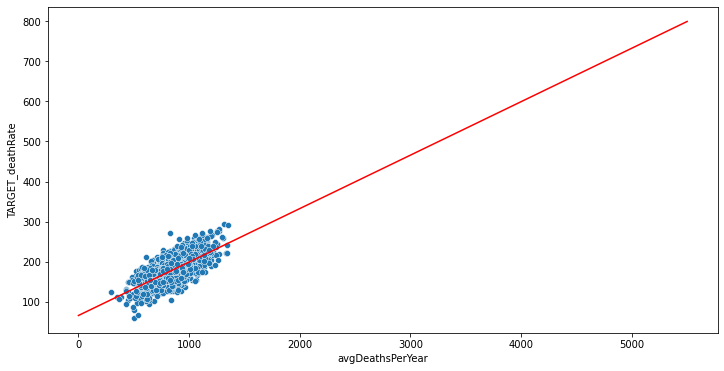

In [158]:
plt.figure(figsize=(12, 6))

# faça um scatterplot da fgeature pelo target
sns.scatterplot(data=df, x="avgDeathsPerYear", y="TARGET_deathRate")

# faça um plot da reta do modelo
# crie um array com os valores de x. dica:  use o range aproximado da variável GrLivArea
# crie um array de y com a equação da reta usando os coeficientes encontrados
x = np.linspace(0, 5500, 10000)
y = reg_lin.intercept_ + reg_lin.coef_[0]*x
plt.plot(x, y, color="red")

Meu modelo é a reta vermelha e as bolinhas azuis são meu conjuto de dados ( todos os dados, não só os de treinamento)

In [159]:
b0 = reg_lin.intercept_
b1 = reg_lin.coef_[0]

In [160]:
# Previsão com a equação da reta: para um índice de 500, eu tenho um númedor médio de 132 mortes 

x = 500

y_hat = reg_lin.intercept_ + reg_lin.coef_[0]*x

x, y_hat

(500, 132.53602538218428)

In [161]:
# previsão usando o predict

reg_lin.predict([[500]])

array([132.53602538])

In [163]:
# 5) Previsão com os dados do teste 

y_pred = reg_lin.predict(x_test.values.reshape(-1, 1))

In [164]:
# Previsões que meu modelo conseguiu fazer
y_pred

array([171.05419294, 159.06524308, 139.54350139, 188.83463515,
       153.81193686, 178.06707316, 218.81779447, 182.48561607,
       181.97990238, 183.57433585, 144.29321776, 167.33647433,
       171.21627568, 180.06022714, 147.09361617, 184.84486542,
       155.32117669, 164.69987381, 192.0198062 , 198.71997653,
       196.89163432, 189.92464837, 105.10692754, 154.96214756,
       165.92801821, 167.94750036, 159.78022911, 177.03368741,
       168.54837406, 198.22587362, 176.95243735, 160.09443257,
       174.3011665 , 197.82263535, 198.01994268, 142.04465244,
       206.76366899, 173.75894683, 213.42037397, 158.1249547 ,
       159.62030083, 215.29762158, 206.85588311, 183.34173337,
       154.52211465, 208.83392056, 165.67907485, 206.80389368,
       166.80220533, 149.87007427, 185.89881408, 200.30401548,
       210.18885601, 137.81163864, 187.4124932 , 180.70934642,
       196.25089975, 165.80720002, 184.09526334, 182.67236724,
       200.37825076, 189.52502375, 177.77654474, 125.02

In [165]:
# Calculando o resíduo
residuo = y_test - y_pred

In [166]:
residuo

1611    31.945807
2526     1.134757
915    -35.443501
1371     3.165365
1079   -19.711937
          ...    
2440    -5.861234
290     21.207206
1545   -27.647015
1964   -21.970998
2184    24.472141
Name: TARGET_deathRate, Length: 914, dtype: float64

In [167]:
# Estatística descritivas do resíduo. Como se dá a distribuição desses dados
# Valores negativos: Valor predito maior que valor real
residuo.describe()

count    914.000000
mean       0.780330
std       19.714537
min      -59.249908
25%      -12.956523
50%        0.528859
75%       12.910769
max       60.930996
Name: TARGET_deathRate, dtype: float64

    3.3 Utilizando as métricas de avaliação verifique o resultado do modelo para o conjunto de dados de teste.

In [174]:
# Scatterplot do valor predito pelo valor real.
# A reta representa um caso onde o y predito ( resultado do meu modelo) é igual ao y real ( dados reais do problema).
# Podemos ver que os pontos estão próximos a reta, ou seja, um valor se aproxima do outro.
x = np.linspace(0, 400, 4000)
y = x
plt.plot(x,y,color='red')


sns.scatterplot(x=y_test, y=y_pred)

<AxesSubplot:xlabel='TARGET_deathRate'>

In [175]:
# R2_ Coeficiênte de Determinação: O quão próximo os dados estão da reta ajustada. Quanto mais próximo os pontos estiverem 
# da reta ajustada, melhor vai ser meu R2. Quanto mais próximo do 1, melhor vai ser meu resultado.
# Meu coeficiente deu um pouco acima da metade, o que representa que meu modelo pode não ser tão bom.

from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.522174726712471

In [178]:
# Verificando a normalidade dos resíduos

# importar
from scipy.stats import normaltest
    
# executar o teste
test_stat, p = normaltest(residuo)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

# nível de significância de 5%. Vou ter uma confiança do meu teste estar correto de 95%
alpha = 0.05 

if p > alpha:
    print("\nFalha em rejeitar H_0: Amostra é normal") # Hipótese nula é verdadeira e meus resíduos seguem uma 
                                                                # distribuição normal
else:
    print("\nRejeição da H_0: Amostra não é normal") # Meus resíduos não seguem uma distribuição normal

Estatística de teste: 3.4575705627318

p-value: 0.17749989149441925

Falha em rejeitar H_0: Amostra é normal


O modelo de regressão linear simples pode ser um modelo adequado

In [179]:
# Calculando as métricas:
from sklearn import metrics

In [180]:
# calculando MAE
metrics.mean_absolute_error(y_test,y_pred)

15.641446313232446

In [181]:
# calculando MSE
metrics.mean_squared_error(y_test,y_pred)

388.8466420137828

In [182]:
# calculando RMSE
metrics.mean_squared_error(y_test,y_pred,squared=False)

19.71919476078531

4. Agora, treine um modelo de Regressão Linear múltipla sem utilizar o min-max scaler e outro com o min-max scaler. Qual obteve o melhor resultado no teste? Quais são as features mais importantes?

In [183]:
# Selecionando apenas as features numéricas
df.select_dtypes(include=[np.number]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3045 entries, 0 to 3046
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3045 non-null   float64
 1   avgDeathsPerYear         3045 non-null   float64
 2   TARGET_deathRate         3045 non-null   float64
 3   incidenceRate            3045 non-null   float64
 4   medIncome                3045 non-null   float64
 5   popEst2015               3045 non-null   float64
 6   povertyPercent           3045 non-null   float64
 7   studyPerCap              3045 non-null   float64
 8   MedianAge                3045 non-null   float64
 9   MedianAgeMale            3045 non-null   float64
 10  MedianAgeFemale          3045 non-null   float64
 11  AvgHouseholdSize         3045 non-null   float64
 12  PercentMarried           3045 non-null   float64
 13  PctNoHS18_24             3045 non-null   float64
 14  PctHS18_24              

In [184]:
# Verificando a quantidade valores nulos em cada coluna
df.select_dtypes(include=[np.number]).isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2283
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          151
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRat

In [185]:
# selecionando as colunas numéricas como a variável de features X
# dropando os valores nulos
df = df.select_dtypes(include=[np.number])
df = df.dropna(axis='columns', how='any')

In [186]:
# Verificando  a ocorrência de valores nulos após o drop
df.isnull().sum()

avgAnnCount               0
avgDeathsPerYear          0
TARGET_deathRate          0
incidenceRate             0
medIncome                 0
popEst2015                0
povertyPercent            0
studyPerCap               0
MedianAge                 0
MedianAgeMale             0
MedianAgeFemale           0
AvgHouseholdSize          0
PercentMarried            0
PctNoHS18_24              0
PctHS18_24                0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
PctMarriedHouseholds      0
BirthRate                 0
dtype: int64

In [187]:
# Criando o X e o y
X = df.drop(columns=['TARGET_deathRate'])
y = df['TARGET_deathRate']

In [188]:
# Nome das colunas que estou considerando (features)
X.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [189]:
# Shape de X. Quantas linhas e quantas colunas sobraram
X.shape

(3045, 28)

Intercepto: 85.24550898510269
Coeficientes angulares: [-1.03928777e-03  8.64777993e-02  1.29339131e-01  1.46699255e-04
  2.65276238e-06  3.25514540e-01  9.82261694e-05 -2.63367520e-03
 -5.29549603e-01  3.16399190e-01 -1.20577792e+00  5.75633795e-01
 -1.06756049e-01  1.56688922e-01 -1.24528910e-01  2.76692613e-01
 -9.35880917e-01  4.12548913e-01 -5.14123218e-01  2.77859265e-01
 -5.23115676e-02  5.57067900e-02 -4.38782752e-02 -6.41432986e-02
  2.25686966e-02 -7.63098307e-01 -7.97870478e-01 -4.86190045e-01]

---------------------------------------------------------



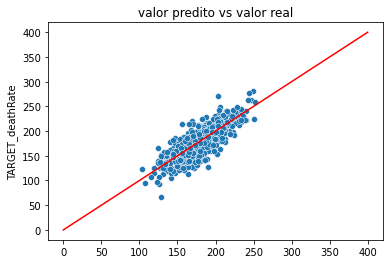


---------------------------------------------------------


Métricas de avaliação (dados de teste):

R^2: 0.6379647066867051
MAE: 12.63795434044462
MSE: 268.8225616897934
RMSE: 16.39580927218274


In [190]:
# Etapas da modelagem

# 1) Importar 
from sklearn.linear_model import LinearRegression

# 2) Instanciar o estimador
estimador = LinearRegression()

# 3) Separar os dados
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# 4) Treinar o modelo
modelo = estimador.fit(X_treino,y_treino)

print("Intercepto:", modelo.intercept_ )
print("Coeficientes angulares:",modelo.coef_ )

print("\n---------------------------------------------------------\n")

# 5) Previsões com meu modelo treinado
predictions = modelo.predict(X_teste)


plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.plot(np.linspace(0, 400, 4000), np.linspace(0, 400, 4000), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n---------------------------------------------------------\n")

print("\nMétricas de avaliação (dados de teste):\n")

# 6) Métricas de avaliação
from sklearn import metrics

print('R^2:', metrics.r2_score(y_teste, predictions))
print('MAE:', metrics.mean_absolute_error(y_teste, predictions))
print('MSE:', metrics.mean_squared_error(y_teste, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predictions)))


Performance de TREINO



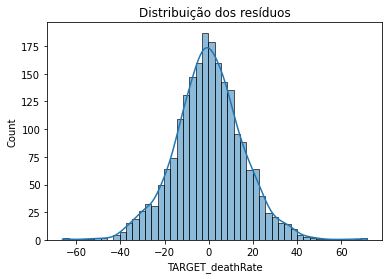


---------------------------------------------------------


Métricas de avaliação (dados de treino):

R^2: 0.6795533537711289
MAE: 11.955589510898562
MSE: 243.12771605540152
RMSE: 15.592553224388928


In [191]:
print("\nPerformance de TREINO\n")

predictions = modelo.predict(X_treino)

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_treino)
plt.plot(np.linspace(0, 400, 4000), np.linspace(0, 400, 4000), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_treino-predictions, kde=True)
plt.show()

print("\n---------------------------------------------------------\n")

print("\nMétricas de avaliação (dados de treino):\n")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_treino, predictions))
print('MAE:', metrics.mean_absolute_error(y_treino, predictions))
print('MSE:', metrics.mean_squared_error(y_treino, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_treino, predictions)))

Comparando métricas de teste com treino: Podemos perceber que os resultado estão próximos, o que é  bom.

Métricas de avaliação (dados de teste):                        Métricas de avaliação (dados de treino):

R^2: 0.6379647066867051                                        R^2: 0.6795533537711289
MAE: 12.63795434044462                                         MAE: 11.955589510898562
MSE: 268.8225616897934                                         MSE: 243.12771605540152
RMSE: 16.39580927218274                                        RMSE: 15.592553224388928





In [192]:
# Dataframe com os coeficientes. Quanto maior for o coeficiente, mais importante é aquela feaure que ele representa.
# Para fazer essa análise é importante que as features estejam na mesma escala.
coeff_df = pd.DataFrame(modelo.coef_, X.columns, columns=['Parameter value'])
coeff_df

Parameter value
avgAnnCount                   -0.001039
avgDeathsPerYear               0.086478
incidenceRate                  0.129339
medIncome                      0.000147
popEst2015                     0.000003
povertyPercent                 0.325515
studyPerCap                    0.000098
MedianAge                     -0.002634
MedianAgeMale                 -0.529550
MedianAgeFemale                0.316399
AvgHouseholdSize              -1.205778
PercentMarried                 0.575634
PctNoHS18_24                  -0.106756
PctHS18_24                     0.156689
PctBachDeg18_24               -0.124529
PctHS25_Over                   0.276693
PctBachDeg25_Over             -0.935881
PctUnemployed16_Over           0.412549
PctPrivateCoverage            -0.514123
PctEmpPrivCoverage             0.277859
PctPublicCoverage             -0.052312
PctPublicCoverageAlone         0.055707
PctWhite                      -0.043878
PctBlack                      -0.064143
PctAsian                       0.022569
PctOtherRace                  -0.763098
PctMarriedHouseholds          -0.797870
BirthRate                     -0.486190

In [193]:
# Colocando todas as features na mesma escala utilizando o Min-Max Scaler

from sklearn.preprocessing import MinMaxScaler 

#1) Instanciar o scaler
mms = MinMaxScaler()

#2) Treinar o scaler apenas com os dados de treino
mms.fit(X_treino)

#3) Transformando os dados
X_treino_scaled = mms.transform(X_treino)
X_teste_scaled = mms.transform(X_teste)


Intercepto: 121.39040548563058
Coeficientes angulares: [-12.88514511  89.5266617  106.58062923  12.67791598  10.15693297
  13.37673653  -4.13915673  -1.68795271 -21.99527224   6.83511453
  -2.45644842  29.32328637  -5.28927695  11.01465518  -4.83682045
  14.03506204 -31.7506728   13.95420826 -34.4913055   14.18710904
   5.16789953  -5.27768807  -3.76004122  -4.75680684  -0.98199809
 -31.6328688  -35.88017791  -8.80776251]

---------------------------------------------------------



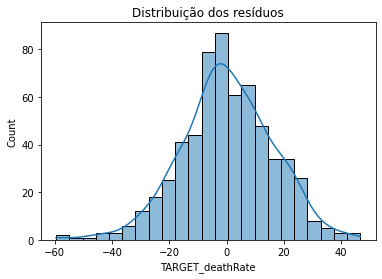


---------------------------------------------------------


Métricas de avaliação (dados de teste):

R^2: 0.6400611996861549
MAE: 12.52749467666093
MSE: 257.81449310115823
RMSE: 16.05660278829735


In [194]:
X = df.drop(columns=["TARGET_deathRate"])
y = df['TARGET_deathRate']

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Utilizando o scaler (usamos o minmax pra que todas as features tenham o mesmo intervalo no espaço amostral)

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

# Treino com os dados de Treino
mms.fit(X_treino)

# transformando os dados
X_treino = mms.transform(X_treino)
X_teste = mms.transform(X_teste)


# 4)
modelo = estimador.fit(X_treino, y_treino)

print("Intercepto:", modelo.intercept_)
print("Coeficientes angulares:", modelo.coef_)

print("\n---------------------------------------------------------\n")

# 5)
predictions = modelo.predict(X_teste)

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.plot(np.linspace(0, 400, 4000), np.linspace(0, 400, 4000), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n---------------------------------------------------------\n")

print("\nMétricas de avaliação (dados de teste):\n")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_teste, predictions))
print('MAE:', metrics.mean_absolute_error(y_teste, predictions))
print('MSE:', metrics.mean_squared_error(y_teste, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predictions)))

In [195]:
# Avaliando os coeficientes com todas as features na mesma escala
coeff_df = pd.DataFrame(modelo.coef_, X.columns, columns=['Parameter value'])

coeff_df.abs().sort_values(by='Parameter value',ascending=False)

Parameter value
incidenceRate                106.580629
avgDeathsPerYear              89.526662
PctMarriedHouseholds          35.880178
PctPrivateCoverage            34.491305
PctBachDeg25_Over             31.750673
PctOtherRace                  31.632869
PercentMarried                29.323286
MedianAgeMale                 21.995272
PctEmpPrivCoverage            14.187109
PctHS25_Over                  14.035062
PctUnemployed16_Over          13.954208
povertyPercent                13.376737
avgAnnCount                   12.885145
medIncome                     12.677916
PctHS18_24                    11.014655
popEst2015                    10.156933
BirthRate                      8.807763
MedianAgeFemale                6.835115
PctNoHS18_24                   5.289277
PctPublicCoverageAlone         5.277688
PctPublicCoverage              5.167900
PctBachDeg18_24                4.836820
PctBlack                       4.756807
studyPerCap                    4.139157
PctWhite                       3.760041
AvgHouseholdSize               2.456448
MedianAge                      1.687953
PctAsian                       0.981998

## RESPOSTA 4

**sem min-max scaler                                                      **com min-max scaler

* Métricas de avaliação (dados de teste):                                 * Métricas de avaliação (dados de teste):
* R^2: 0.6379647066867051                                                 * R^2: 0.6400611996861549
* MAE: 12.63795434044462                                                  * MAE: 12.52749467666093
* MSE: 268.8225616897934                                                  * MSE: 257.81449310115823
* RMSE: 16.39580927218274                                                 * RMSE: 16.05660278829735


O modelo que teve melhor resultado foi o com min-max scaler embora os valores estejam muito próximos.
As features mais importantes são incidenceRate e avgDeathsPerYear pois são as que apresentam maior coeficiente.

5. Compare os três modelos desenvolvidos.

## regressão simples
Métricas de avaliação (dados de teste):

R^2: 0.522174726712471
MAE: 15.641446313232446
MSE: 388.8466420137828
RMSE: 19.71919476078531


## regressão múltipla sem min-max scaler  

Métricas de avaliação (dados de teste):

R^2: 0.6379647066867051
MAE: 12.63795434044462
MSE: 268.8225616897934
RMSE: 16.39580927218274

## regressão múltipla com min-max scaler

Métricas de avaliação (dados de treino):

R^2: 0.6795533537711289
MAE: 11.955589510898562
MSE: 243.12771605540152
RMSE: 15.592553224388928

Comparando os três modelos podemos perceber que o melhor é o feito com regressão múltipla com min-max scaler. 
Porém, podemos perceber que não há grandes diferenças entre os modelos. Talvez fosse preciso aumentar a amostra 
para chegar num modelo mais preciso.